In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from iads.nlp import visualisation as visual
from iads.nlp import preprocessing
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

# I. Chargement des données :

In [2]:
df_avis_up = pd.read_csv("../data/avis_clean.csv")

# II. Statistiques

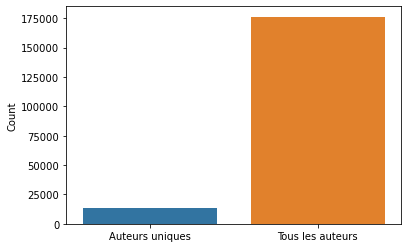

In [3]:
sns.barplot(x = ["Auteurs uniques", "Tous les auteurs"], 
           y = [len(np.unique(df_avis_up["author"])), len(df_avis_up["author"])])
plt.ylabel("Count")
plt.show()

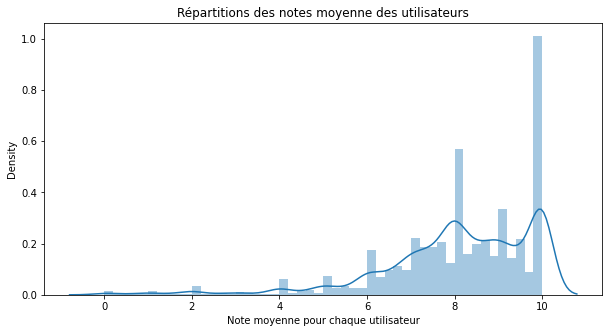

In [4]:
note_g = df_avis_up.groupby("author")["note"].mean()
authors = note_g.keys()
notes = note_g.values

plt.figure(figsize=(10, 5))
sns.distplot(notes).set(title="Répartitions des notes moyenne des utilisateurs")
plt.xlabel("Note moyenne pour chaque utilisateur")
plt.show()

In [5]:
authors, counts = np.unique(df_avis_up["author"], return_counts=True)

In [6]:
index = counts.argsort()[::-1]
counts = counts[index]
authors = authors[index]

- Le nombre d'avis suit une loi de `Zipf`

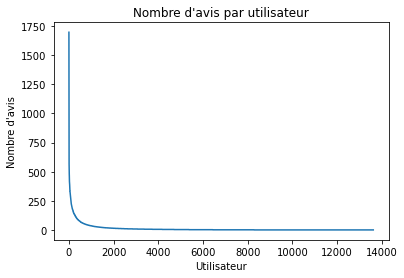

In [7]:
plt.plot(counts)
plt.title("Nombre d'avis par utilisateur")
plt.ylabel("Nombre d'avis")
plt.xlabel("Utilisateur")
plt.show()

## Top 10 des utilisateurs : 

In [8]:
top_authors = authors[:10]
top_counts = counts[:10] 

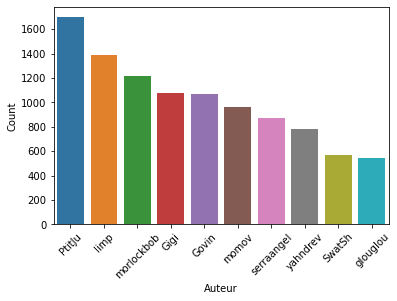

In [9]:
ax = sns.barplot(x = top_authors, y = top_counts)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel("Auteur")
plt.ylabel("Count")
plt.show()

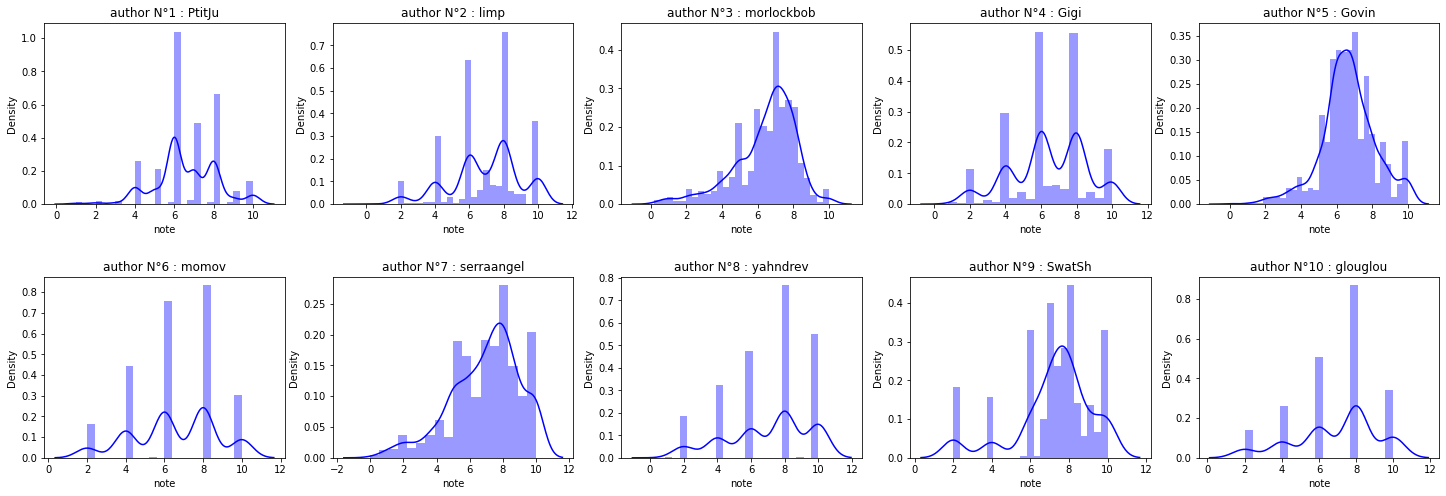

In [10]:
plt.figure(figsize=(25, 8))

i = 1
for aut in top_authors:
    notes = df_avis_up[df_avis_up["author"] == aut]["note"]        
    plt.subplot(2, 5, i)
    sns.distplot(notes, color="blue").set(title=f"author N°{i} : {aut}")
    i += 1
    
plt.subplots_adjust(hspace=0.4)
plt.show()

In [11]:
seuil = df_avis_up["note"].median()
seuil

8.0

### Notes positives : 

In [12]:
df_pos = df_avis_up[df_avis_up["note"] >= seuil]

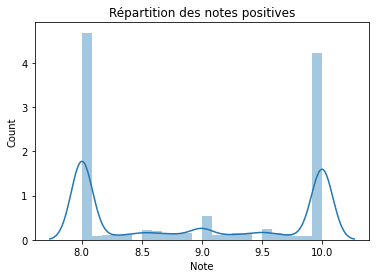

In [13]:
sns.distplot(df_pos["note"])
plt.title("Répartition des notes positives")
plt.xlabel("Note")
plt.ylabel("Count")
plt.show()

In [14]:
pos_auth, pos_counts = np.unique(df_pos["author"], return_counts=True)

index = pos_counts.argsort()[::-1]
pos_counts = pos_counts[index]
pos_auth = pos_auth[index]

In [15]:
print("Nombre d'auteur avec des notes positives :", len(pos_auth))

Nombre d'auteur avec des notes positives : 12149


In [16]:
top_pos_auth = pos_auth[:10]
top_pos_counts = pos_counts[:10] 

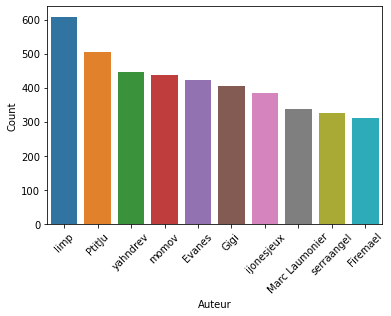

In [17]:
ax = sns.barplot(x = top_pos_auth, y = top_pos_counts)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel("Auteur")
plt.ylabel("Count")
plt.show()

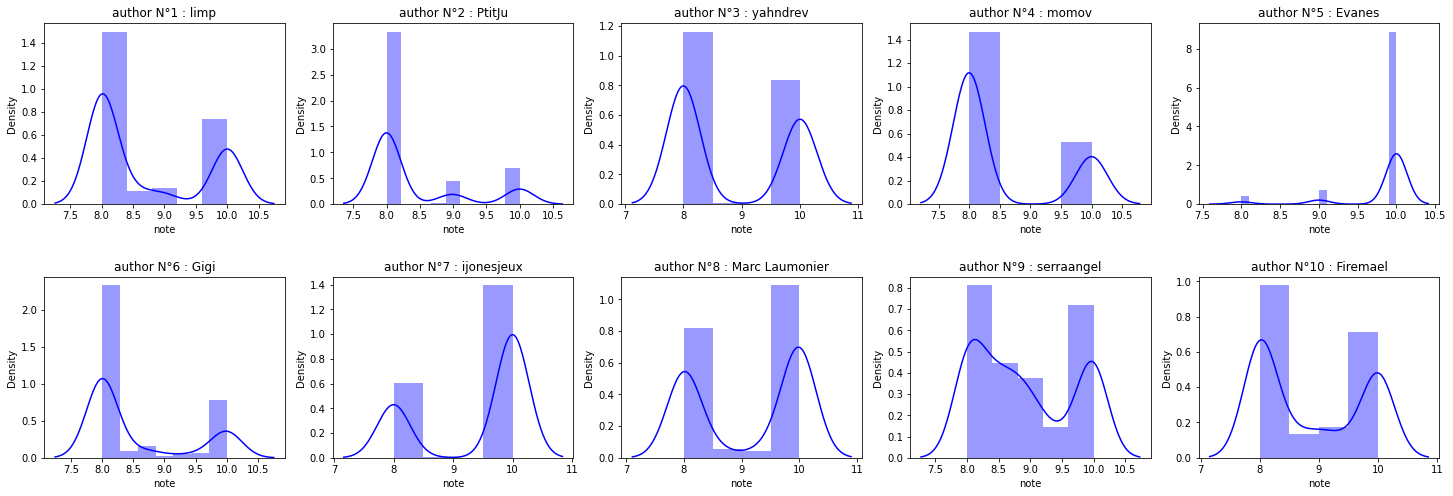

In [18]:
plt.figure(figsize=(25, 8))

i = 1
for aut in top_pos_auth:
    notes = df_pos[df_pos["author"] == aut]["note"]        
    plt.subplot(2, 5, i)
    sns.distplot(notes, color="blue").set(title=f"author N°{i} : {aut}")
    i += 1
    
plt.subplots_adjust(hspace=0.4)
plt.show()

### Notes négatives : 

In [19]:
df_neg = df_avis_up[df_avis_up["note"] < seuil]

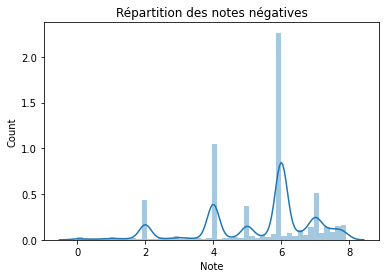

In [20]:
sns.distplot(df_neg["note"])
plt.title("Répartition des notes négatives")
plt.xlabel("Note")
plt.ylabel("Count")
plt.show()

In [21]:
neg_auth, neg_counts = np.unique(df_neg["author"], return_counts=True)

index = neg_counts.argsort()[::-1]
neg_counts = neg_counts[index]
neg_auth = neg_auth[index]

In [22]:
print("Nombre d'auteur avec des notes négatives :", len(neg_auth))

Nombre d'auteur avec des notes négatives : 7264


In [23]:
top_neg_auth = neg_auth[:10]
top_neg_counts = neg_counts[:10] 

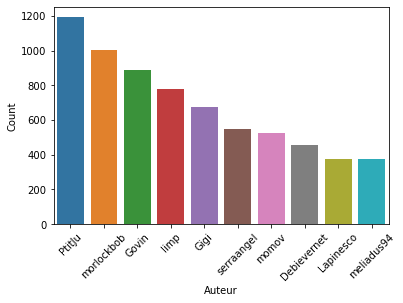

In [24]:
ax = sns.barplot(x = top_neg_auth, y = top_neg_counts)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.xlabel("Auteur")
plt.ylabel("Count")
plt.show()

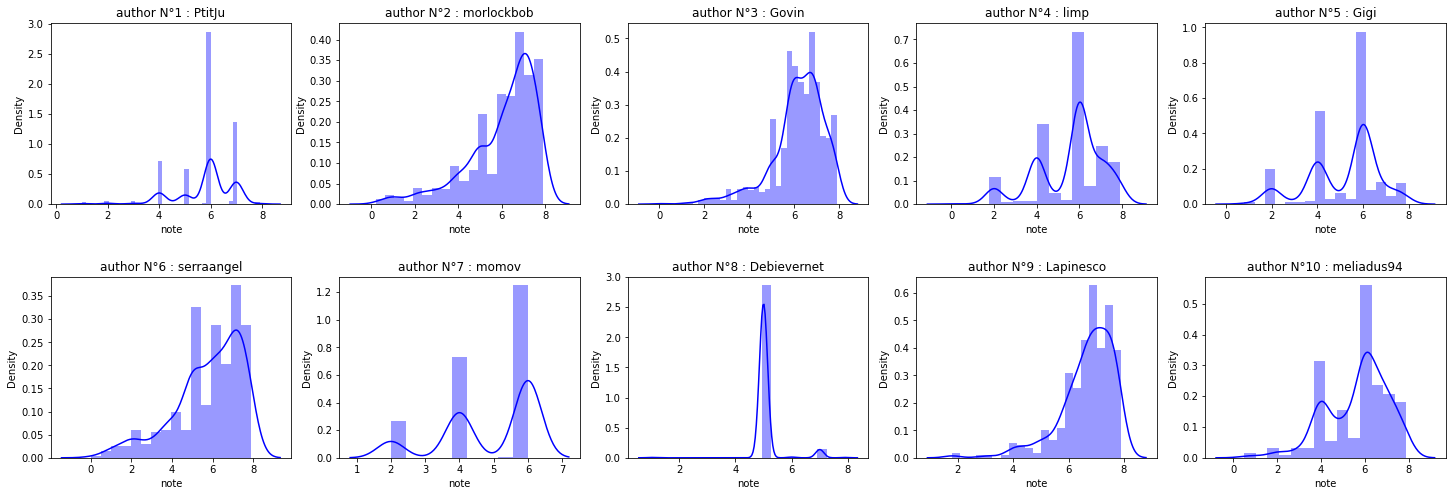

In [25]:
plt.figure(figsize=(25, 8))

i = 1
for aut in top_neg_auth:
    notes = df_neg[df_neg["author"] == aut]["note"]        
    plt.subplot(2, 5, i)
    sns.distplot(notes, color="blue").set(title=f"author N°{i} : {aut}")
    i += 1
    
plt.subplots_adjust(hspace=0.4)
plt.show()

In [26]:
from tqdm import tqdm
tqdm.pandas()

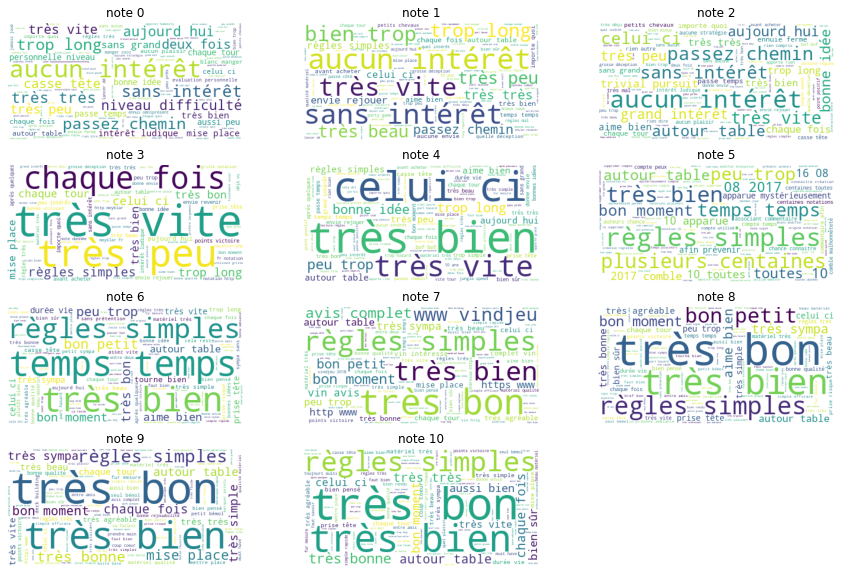

In [28]:
sw = stopwords.words('french') + \
    ["jeu", "être", "avoir", "plus", "tout", "cartes", 
     "joueurs", "partie", "parties", "ça", "si", "faire", 
     "fait", "vraiment", "jouer", "comme", "peut", 
     "ce", "cette", "quand", "car", "jeux", "donc", 
     "autres", "encore", "alors", "là", "dés", "ou", 
     "où", "carte", "tous", "joueur", "chose", "tric", 
     "trac", "doute", "beaucoup"] 

comments_df = df_avis_up[df_avis_up["comment"].notna()]

notes_int = comments_df["note"] // 1

words_notes = {}

for note in range(11):
    words_notes[note] = np.array(comments_df[notes_int == note]["comment"])
    
plt.figure(figsize=(15, 10))

for note in words_notes:
    wordcloud = visual.get_wordcloud(words_notes[note], sw) 
    plt.subplot(4, 3, note + 1)
    plt.title(f"note {note}")
    plt.imshow(wordcloud)
    plt.axis('off')